In [3]:
# Importing the main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('train.csv')

In [5]:
dataset.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


<h3> index, beer/beerId, beer/brewerId, review/timeUnix, user/profileName will have no effect on overall rating. Hence they will be excluded.</h3>

<h3> Both user/ageInSeconds and user/birthdayRaw depicts the same thing. Hence user/birthdayRaw will not be included.</h3>

In [4]:
dataset.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
index                37500 non-null int64
beer/ABV             37500 non-null float64
beer/beerId          37500 non-null int64
beer/brewerId        37500 non-null int64
beer/name            37500 non-null object
beer/style           37500 non-null object
review/appearance    37500 non-null float64
review/aroma         37500 non-null float64
review/overall       37500 non-null float64
review/palate        37500 non-null float64
review/taste         37500 non-null float64
review/text          37490 non-null object
review/timeStruct    37500 non-null object
review/timeUnix      37500 non-null int64
user/ageInSeconds    7856 non-null float64
user/birthdayRaw     7856 non-null object
user/birthdayUnix    7856 non-null float64
user/gender          15314 non-null object
user/profileName     37495 non-null object
dtypes: float64(8), int64(4), object(7)
memory usage: 5.4+ MB


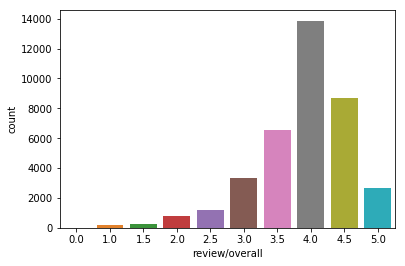

In [9]:
import seaborn as sns
sns.countplot('review/overall', data=dataset)

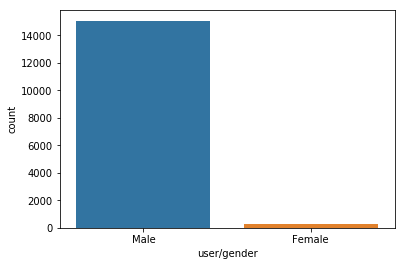

In [8]:
sns.countplot('user/gender', data=dataset)

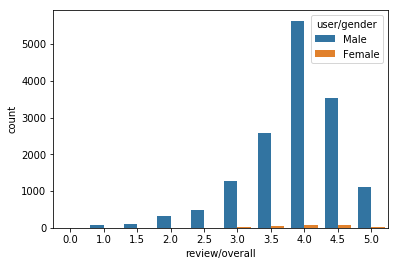

In [7]:
sns.countplot('review/overall', data=dataset, hue='user/gender')

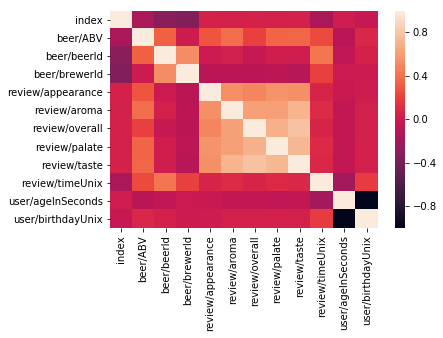

In [10]:
corr=dataset.corr()
sns.heatmap(corr)

# Checking for missing values

In [9]:
dataset.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [10]:
dataset['user/gender'].value_counts()

Male      15069
Female      245
Name: user/gender, dtype: int64

<h3> Observation : Here user/ageInSeconds, user/birthdayRaw , user/gender contain null values which can be treated with many methods like filling with mean or mode. But here nearly 80% data is missing. So, we won't use these columns as it will give inaccurate results.</h3>

In [6]:
# review/text columns contain null values which have to be treated.
dataset = dataset[pd.notnull(dataset.iloc[:,11])]

In [7]:
# Finally we selected the following data
x = dataset.iloc[:, [1,4,5,6,7,9,10,11,12]].values     # Independent Variables
y = dataset.iloc[:, 8].values                          # Dependent Variables

In [ ]:
# review/text column is a very important column. NLP(Natural Language Processing) is used on it.

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Anu
[nltk_data]     Dhull\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# corpus is created, which is a bag of words of model
corpus = []
for i in range(0, 37490):
    review = re.sub('[^a-zA-Z]',' ', x[i][7])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()   
y = dataset.iloc[:, 8].values

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
# Linear Regression is applied on it.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
y_pred = regressor.predict(x)
y_pred

array([3.83130729, 3.06153042, 3.96454685, ..., 3.77433813, 3.92167154,
       3.76960879])

<h3> We predicted value taking text column only. And text column is replaced by this value. So that text column can have influence on overall review.</h3>

In [19]:
dataset['review/text'] = y_pred
y_pred

array([3.83130729, 3.06153042, 3.96454685, ..., 3.77433813, 3.92167154,
       3.76960879])

In [26]:
x = dataset.iloc[:, [1,4,5,6,7,9,10,11,12]].values
y = dataset.iloc[:, 8].values

<h3> beer/name and beer/style are categorical variables which needs to be encoded.</h3>

In [29]:
# Encoding categorical variable beer/name
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1]=le.fit_transform(x[:,1])

In [30]:
# Encoding categorical variable beer/style
le = LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])

<h3>In review/timeStruct, there are 10 key-value pairs. Out of them, "month" can have effect on overall review. Thus it is extracted from each value.</h3>

In [31]:
for i in range(0,37490):
    x[:,8][i] = x[:,8][i].split(",")[6].split(":")[1].strip()

In [32]:
# Finally, data prepcessing and feature engineering has been done. Now comed modelling part.
x[0]

array([5.0, 368, 61, 4.0, 4.0, 4.0, 4.0, 3.831307287178176, '12'],
      dtype=object)

# Multiple Linear Regression

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [34]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
y_pred

array([3.90395731, 3.68014859, 3.72329239, ..., 3.28193976, 3.50742213,
       3.80847439])

In [ ]:
# Now evaluating the model's performance

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

# Decision Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [39]:
y_pred = regressor.predict(x_test)

In [40]:
y_pred

array([4. , 4. , 4. , ..., 3. , 3.5, 2.5])

In [41]:
y_test

array([3.5, 3.5, 3.5, ..., 2. , 4.5, 3.5])

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

# Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
y_pred = regressor.predict(x_test)

In [46]:
y_pred

array([4.   , 3.775, 3.875, ..., 3.1  , 3.6  , 3.8  ])

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared